/tmp/ipykernel_66458/614403069.py:142: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  ax.plot(lons[0], lats[0], 'ko', markersize=5, color='black', transform=ccrs.PlateCarree())
/tmp/ipykernel_66458/614403069.py:142: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  ax.plot(lons[0], lats[0], 'ko', markersize=5, color='black', transform=ccrs.PlateCarree())
/tmp/ipykernel_66458/614403069.py:142: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  ax.plot(lons[0], lats[0], 'ko', markersize=5, color='black', transform=ccrs.PlateCarree())
/tmp/ipykernel_66458/614403069.py:142: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "

[30, 32, 39, 76, 54, 41, 31, 41, 34]
76
76


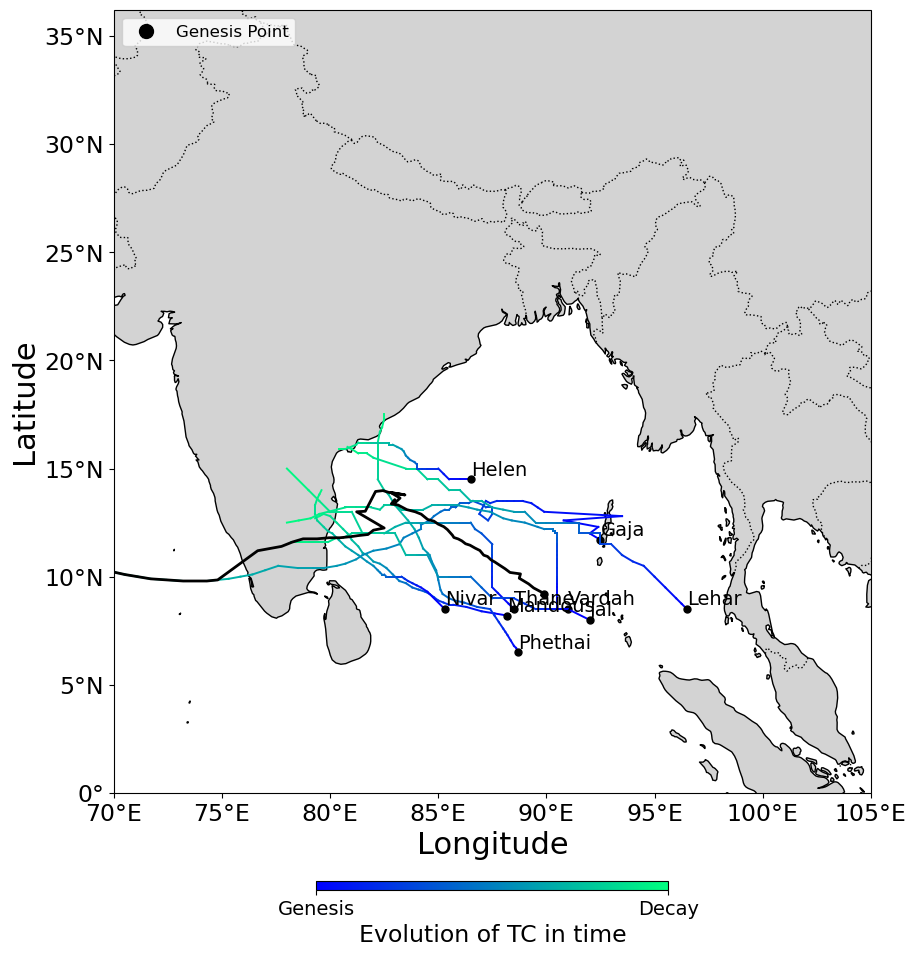

In [23]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.cm as cm
import xarray as xr

# Define the coordinates of the Bay of Bengal region
lon_min, lon_max = 70, 105
lat_min, lat_max = 0, 35

# Define track data for multiple cyclones
cyclone_tracks = [
{
        'name': 'Mandous',
        'track': [(8.2, 88.2),(8.3,87.6), (8.4, 87.0), (8.6, 86.3), (8.7, 85.7), (8.7, 85.5),(8.8,85.25),
           (8.9, 85.0),(9.05,84.8), (9.2, 84.6), (9.3, 84.4), (9.4, 84.1), (9.5, 83.8), (9.7, 83.5),
           (9.8, 83.2), (10.1, 82.9), (10.4, 82.6), (10.6, 82.3), (10.7, 82.0), (11.0, 81.7), (11.1, 81.5),
           (11.4, 81.3), (11.7, 81.0), (12.0, 80.8), (12.2, 80.6), (12.5, 80.3), (12.8, 80.0), (12.9, 79.7),
           (12.8, 79.5), (12.7, 79.3),]
    },
{
        'name': 'Nivar',
        'track': [(8.5, 85.3), (9.3, 84.5), (9.5, 84.2), (9.6, 84.0),(9.7,83.8), (9.8, 83.6),(9.9,83.45), (10.0, 83.3),
       (10.0,83.15), (10.0, 83.0), (10.0, 83.0), (10.0, 82.7), (10.0, 82.6), (10.1, 82.5), (10.1, 82.4), (10.2, 82.3),
       (10.3, 82.2), (10.5, 82.0), (10.7, 81.7), (11.0, 81.3), (11.2, 81.0), (11.4, 80.7), (11.7, 80.4),
       (12.0, 80.1), (12.1, 79.9), (12.3, 79.7), (12.6, 79.4), (12.9, 79.3), (13.3, 79.3), (13.6, 79.4), 
       (13.8,79.5), (14.0, 79.6),]
       
    },
{
        'name': 'Phethai',
        'track': [(6.5, 88.7), (6.7, 88.6), (6.8, 88.5),(7.05,88.35), (7.3, 88.2), (7.45,88.1), (7.6, 88.0),(7.9,87.8), (8.2, 87.6), (8.5, 87.4), (8.5, 87.4),(8.55,87.1),
        (8.6, 86.8), (8.7,86.5), (8.8, 86.2), (8.9,85.75), (9.0, 85.5), (9.2, 85.2), (9.4, 85.1), (9.85,85), (10.3, 84.9), (10.7, 84.7), (11.0, 84.6), (11.1, 84.5), (11.3, 84.3), 
        (11.8, 84.1), (12.2, 83.9), (12.6,83.6), (13.3, 83.0), (13.8, 82.7), (14.0, 82.5), (14.5, 82.2), (15.2, 82.2), (15.8, 82.2), (16.2, 82.2), 
        (16.7, 82.3), (16.9, 82.4), (17.3, 82.5), (17.5, 82.5),]
       
    },
{
        'name': 'Gaja',
        'track':[(11.7, 92.5), (12.0, 92.0), (12.3,92.4), (12.6, 90.8), (12.8,93.5), (13.0, 89.9), (13.2,89.6), (13.4, 89.3), (13.5, 88.9),
      (13.5, 88.5), (13.5, 88.2), (13.5, 88.0), (13.5, 87.7), (13.4, 87.4), (13.5, 87.2), (13.3, 87.1), (13.1, 87.0),
      (12.9, 86.9), (12.9, 86.9), (12.6, 87.3), (12.9, 87.5), (13.2, 87.5), (13.2, 87.3), (13.2, 87.2), (13.3, 87.1), 
      (13.5, 86.6), (13.4, 86.4), (13.4, 86.0), (13.2, 85.8), (13.2, 85.6), (13.1, 85.5), (13.1, 85.3), (13.0, 85.1), 
      (12.8, 84.8), (12.6, 84.6), (12.4, 84.2), (12.2, 84.2), (12.0, 83.8), (11.8, 83.4), (11.5, 83.2), (11.3, 82.6),
      (11.2, 82.0), (11.0, 81.5), (10.8, 81.2), (10.6, 80.7), (10.5, 80.3), (10.4, 79.7), (10.4, 79.2), (10.4, 78.5), 
      (10.5, 77.6), (10.3,77), (10.1, 76.4), (10,75.85), (9.9, 75.3), (9.85,74.8), (9.8, 74.3), (9.8, 73.7), (9.8, 73.2),
      (9.85,72.45), (9.9, 71.7), (10,71.1), (10.1, 70.5), (10.2,70.05), (10.3, 69.6), (10.4, 69.4), (10.5, 69.0), (10.6,68.75),(10.7, 68.5),
      (10.75,68), (10.8, 67.5),(10.9,67.05), (11.0, 66.6), (11.1, 66.3), (11.2, 65.8), (11.2, 65.4), (11.2, 65.0),]

       
    },
{
        'name': 'Vardah',
        'track': [(8.5, 91.0), (8.5, 90.5), (9,90.5), (9.5, 90.5), (9.65,90.5), (9.8, 90.5), 
        (9.8, 90.5), (9.8, 90.5), (9.9,90.5), (10.0, 90.5), (10.4,90.5), (10.8, 90.5),
        (11,90.5), (11.2, 90.5), (11.5, 90.5), (11.5, 90.5), (11.5, 90.5), (11.7, 90.5),
        (11.7, 90.5), (11.8, 90.5), (12.0, 90.5), (12.0, 90.4), (12.1, 90.4), (12.1, 90.3),
        (12.2, 90.3), (12.2, 90.0), (12.2, 89.9), (12.3, 89.6), (12.5, 89.0), (12.6, 88.4),
        (12.7, 88.0), (13.0, 87.4), (13.1, 86.8), (13.2, 86.4), (13.3, 85.9), (13.3, 85.3), 
        (13.3, 85.0), (13.3, 84.7), (13.1, 84.3), (13.1, 83.7), (13.1, 83.3), (13.3, 83.0), 
        (13.3, 82.5), (13.1, 82.3), (13.2, 81.9), (13.2, 81.6), (13.2, 81.2), (13.2, 80.7), 
        (13.1, 80.3), (13.0, 79.9), (12.9, 79.5), (12.7, 79.1), (12.6,78.55), (12.5, 78.0),]

       
    },    
{
        'name': 'Lehar',
        'track':[(8.5,96.5),(8.75,96.25) ,(9.0,96.0),(9.5,95.5), (10.0,95.0),(10.0,95.0),(10.5,94.5),(10.7,94.0),(11.0,93.5),(11.0,93.5),
       (11.5,93.0),(11.5,92.5),(12.0,92.5),(12.0,92),(12.0,91.5),(12.0,91.5),(12.5,91.5),(12.5,91.0),(12.5,91.0),
       (12.5,91.0),(12.5,90.5),(12.5,90.0),(12.5,89.5),(13.0,89.0),(13.0,88.5),(13.0,88.5),(13.1,88.0),
       (13.2,87.5),(13.5,87.0),(13.5,86.5),(14.0,86.0),(14.0,85.5),(14.5,85.0),(14.5,84.5),(15.0,84.0),
       (15.0,83.5),(15.5,82.0),(15.7,81.7),(15.7,81.3),(15.9,81.0),(16.0,80.8),]
       
    }, 
{
        'name': 'Helen',
        'track': [(14.5, 86.5), (14.5, 86.0), (14.5, 85.5), (14.75, 85.25), (15.0, 85.0), (15.0, 85.0), (15.0, 84.5),
       (15.0, 84.25), (15.0, 84.0), (15.0, 84.0), (15.2, 84.0), (15.2, 84.0), (15.3, 83.9), (15.3, 83.9),
       (15.4, 83.7), (15.5, 83.6), (15.6, 83.5), (15.8, 83.4), (15.9, 83.3), (16.0, 83.1), (16.1, 82.9),
       (16.1, 82.7), (16.2, 82.7), (16.2, 82.3), (16.2, 81.9), (16.2, 81.7), (16.2, 81.3), (16.1, 81.2),
       (15.9, 80.7), (15.9, 80.55),(15.9, 80.4),]
    },
{
        'name': 'Thane',
        'track':[(8.5,88.5), (8.75,88.25), (09.0,88.0),(9.25,87.75),(09.5,87.5),(09.5,87.5), (10.0,87.5),(10.25,87.5),
       (10.5,87.5),(10.75, 87.5), (11.0,87.5),(11.0,87.5),(11.5,87.5),(12.0,87.0),(12.0,87.0),(12.2,86.7),(12.5,86.5),
       (12.5,86.5),(12.5,86.0),(12.5,86.0),(12.5,85.5),(12.5,85.5),(12.5,85.0),(12.5,85.0),(12.5,84.5),
       (12.5,84.0),(12.5,84.0),(12.5,83.5),(12.3,83.0),(12.0,82.5),(12.0,82.0),(12.0,81.7),(12.0,81.3),
       (12.0, 81.0),(11.8,80.6), (11.8, 80.3), (11.6, 79.9), (11.6, 79.5), (11.6 ,79.0), (11.6, 78.6), 
       (11.6, 78.2),]
     
    },
{
        'name': 'Jal',
        'track': [(8.0,92.0),(8.5,91.0),(8.5,90.5),(8.5,90.25),(8.5,90.0),(8.5,89.75),(8.5,89.5),(8.75,89),(9.0,88.5),(9.0,88.0), (9.0,87.5),(9.0,87.5),
     (9.5,87.0),(9.5,87.0),(10.0,86.5),(10.0,86.0),(10.0,85.5),(10.0,85.5),(10.0,85.0),(10.0,85.0),
     (11.0,84.5),(11.0,84.5),(11.0,84.0),(11.0,84.0),(11.0,83.5),(12.0,83.0),(12.0,82.5),(12.0,81.5),
     (13.0,81.0),(13.0,80.5),(13.0,80.0), (13.5,79.5), (14.0,79.0),(15.0,78.0),]

     
   },

    
    # Add more cyclone track data lists as needed
]

# Create a new figure
fig = plt.figure(figsize=(10, 10))

# Create a Cartopy map with a PlateCarree projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Set the extent based on the track data
ax.set_extent([lon_min, lon_max, lat_min, lat_max])

# Add grey color to land
ax.add_feature(cfeature.LAND, facecolor='lightgrey')

# Add skyblue color to ocean
#ax.add_feature(cfeature.OCEAN, color='lightblue')
#ax.stock_img()
# Add coastline and borders
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')



for cyclone_data in cyclone_tracks:
    track_data = cyclone_data['track']
    cyclone_name = cyclone_data['name']

    lats, lons = zip(*track_data)

    gradient = np.linspace(0, 1, len(lons))
    for i, color in enumerate(plt.get_cmap('winter')(gradient)):
      ax.plot(lons[i:i+2], lats[i:i+2], color=color, linewidth=1.4, transform=ccrs.PlateCarree())

    # Mark the starting point
    ax.plot(lons[0], lats[0], 'ko', markersize=5, color='black', transform=ccrs.PlateCarree())

    # Add the cyclone name as text
    ax.text(lons[0], lats[0], cyclone_name, color='black', fontsize=14, ha='left', va='bottom', transform=ccrs.PlateCarree())
 # Calculate the number of timesteps for each cyclone
num_timesteps_list = [len(cyclone_data['track']) for cyclone_data in cyclone_tracks]
print(num_timesteps_list)

# Calculate the average number of timesteps
average_num_timesteps = np.max(num_timesteps_list)
print(average_num_timesteps)


# Calculate the average number of timesteps
average_num_timesteps = int(np.max(num_timesteps_list))
print(average_num_timesteps)

# List to store mean track data
mean_track_data = []

for timestep in range(average_num_timesteps):  # considering up to timestep 46
    # List to store latitudes and longitudes for the current timestep
    latitudes = []
    longitudes = []

    # Iterate through each cyclone
    for cyclone_data in cyclone_tracks:
        if timestep < len(cyclone_data['track']):
            # Add latitude and longitude for the current timestep
            latitudes.append(cyclone_data['track'][timestep][0])
            longitudes.append(cyclone_data['track'][timestep][1])

    # Calculate mean latitude and longitude for the current timestep
    mean_latitude = np.mean(latitudes)
    mean_longitude = np.mean(longitudes)

    # Add mean track data for the current timestep
    mean_track_data.append((mean_latitude, mean_longitude))

# Plot mean track data
lats, lons = zip(*mean_track_data)
ax.plot(lons, lats, color='black', linestyle='solid', linewidth=2, transform=ccrs.PlateCarree())
ax.plot(lons[0], lats[0], 'ko', markersize=5, transform=ccrs.PlateCarree())
      
# Add the color bar
cbar = plt.cm.ScalarMappable(cmap=cm.viridis, norm=plt.Normalize(0, 1))
cbar.set_array(gradient)

# Add the color bar without specific ticks
cbar = plt.cm.ScalarMappable(cmap=cm.winter, norm=plt.Normalize(0, 1))
cbar.set_array(gradient)

# Set color bar tick parameters without showing numbers
cb = plt.colorbar(cbar, orientation='horizontal', fraction=0.01, pad=0.1, aspect=40)
cb.set_label('Evolution of TC in time', fontsize=17)
cb.ax.set_xticks([])  # Remove tick marks
cb.ax.set_xticklabels([])  # Remove tick labels
# Add custom tick labels
cb.ax.set_xticks([0, 1])  # Set ticks at the beginning and end
cb.ax.set_xticklabels(['Genesis', 'Decay'], fontsize=14)

# Legend handles for custom legend entries
#track_line = Line2D([0], [0], color=cm.viridis(0.7), linewidth=2, label='Evolutionary Track of TC')
genesis_dot = Line2D([0], [0], marker='o', color='black', markersize=10,linestyle='None', label='Genesis Point')
legend_handles = [ genesis_dot]
ax.legend(handles=legend_handles, loc='upper left', fontsize=12)
# Label latitude and longitude values on the axes
ax.set_xticks(range(lon_min, lon_max + 1, 5), crs=ccrs.PlateCarree())
ax.set_yticks(range(lat_min, lat_max + 1, 5), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# Label latitude and longitude
ax.set_xlabel('Longitude',fontsize=22)
ax.set_ylabel('Latitude',fontsize=22)
ax.tick_params(axis='x', labelsize=17)  # Adjust font size for x-axis tick labels
ax.tick_params(axis='y', labelsize=17)  # Adjust font size for y-axis tick labels
plt.subplots_adjust(left=0.1, right=0.96, top=.98, bottom=0.1)

plt.savefig('/home/gokulsuresh/Downloads/postmonsoon_nRI.png',dpi=300)
# Show the plot
plt.show()

[23, 49, 54, 59, 39, 49, 39]
44.57142857142857
44


/tmp/ipykernel_66458/142213439.py:199: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb = plt.colorbar(cbar, orientation='horizontal', fraction=0.01, pad=0.1, aspect=40)


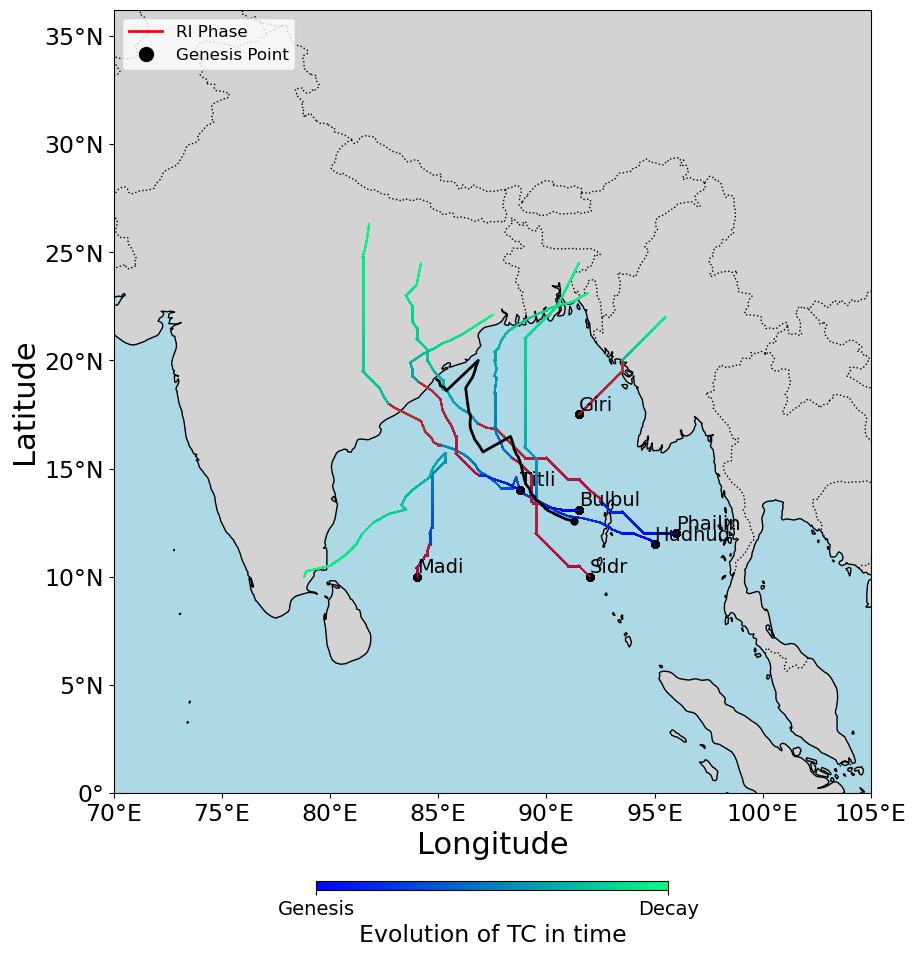

In [13]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.lines as mlines
from matplotlib.lines import Line2D
import numpy as np
import matplotlib.cm as cm


# Define the coordinates of the Bay of Bengal region
lon_min, lon_max = 70, 105
lat_min, lat_max = 0, 35

# Define track data for multiple cyclones
cyclone_tracks = [
{
        'name': 'Giri',
        'intensification_range': (0,16),  # Add the rapid intensification range for Cyclone here
        'track': [(17.5,91.5),(17.5,91.5),(17.5,91.5),(17.5,91.5),(17.5,91.5),(17.5,91.5),(17.5,91.5),(17.5,91.5),(18.0,92),(18.0,92),
 (18.0,92.0),(18.5,92.5),(18.5,92.5),(19.0,93),(19.0,93),(19.5,93.5),(19.8,93.5),(20.0,93.5),
 (20.5,94),(20.5,94),(21.0,94.5),(21.5,95),(22.0,95.5),]  # Add the track data for Cyclone here
       
    },
{
        'name': 'Phailin',
        'intensification_range': (9,28),  # Add the rapid intensification range for Cyclone here
        'track': [(12.0,96.0),(12.0,95.5),(12.0,95),(12.0,94.5),(12.25,94.25),(12.5,94.0),(13.0,93.5),(13.0,93.5),(13.0,93.0),(13.5,92.5),
 (13.5,92.5),(13.6,92.5),(14.0,92.0),(14.0,92.0),(14.5,91.5),(14.5,91.0),(15.0,90.5),(15.0,90.5),
 (15.5,90.0),(15.5,90.0),(15.5,89.5),(15.5,89.0),(16.0,88.5),(16.0,88.5),(16.2,88.3),(16.5,88.0),
 (16.8,87.7),(16.9,87.2),(17.0,87.0),(17.1,86.8),(17.5,86.5),(17.8,86.0),(18.1,85.7),(18.6,85.4),
 (18.7,85.2),(19.1,85.2),(19.5,84.8),(20.0,84.5),(20.5,84.5),(21.0,84.0),(21.5,84.0),(21.8,83.8),
 (22.5,83.8),(22.75,83.65),(23.0,83.5),(23.25,83.75),(23.5,84.0),(24.0,84.1),(24.5,84.2),]  # Add the track data for Cyclone 
       
    },
{
        'name': 'Madi',
        'intensification_range': (0,13),  # Add the rapid intensification range for Cyclone here
        'track': [(10.0,84.0),(10.0,84.0),(10.1,84.0),(10.2,84.0),(10.3,84.0),(10.4,84.0),(10.45,84.05),(10.5,84.1),(10.5,84.1),(10.7,84.2),(10.8,84.3),
 (11.0,84.4),(11.0,84.5),(11.2,84.5),(11.5,84.6),(11.8,84.6),(12.0,84.6),(12.3,84.7),(12.6,84.7),
 (13.0,84.7),(13.2,84.7),(13.4,84.7),(13.6,84.7),(13.8,84.7),(14.0,84.7),(14.3,84.7),(14.4,84.7),
 (14.6,84.7),(14.7,84.7),(14.8,84.8),(14.8,84.8),(15.0,85.0),(15.3,85.3),(15.4,85.3),(15.7,85.3),
 (15.4,85.0),(15.1,84.8),(14.9,84.7),(14.6,84.6),(14.3,84.2),(14.0,83.8),(13.7,83.5),(13.5,83.4),
 (13.3,83.3),(13.1,83.5),(12.9,82.7),(12.7,82.35),(12.5,82.0),(12.0,81.5),(11.5,81.2),(11.0,80.7),(10.5,80.0),(10.25,78.9),
 (10.0,78.8),]  # Add the track data for Cyclone here
       
    },
{
        'name': 'Hudhud',
        'intensification_range': (33,42),  # Add the rapid intensification range for Cyclone here
        'track': [(11.5, 95.0), (11.7, 94.8), (11.85,94.4),(12.0, 94.0), (12.0,93.75),(12.0, 93.5),(12.1,93.25), (12.2, 93.0), (12.3, 92.9), (12.5, 92.5), (12.7, 91.7),
 (12.8, 91.0), (13.0, 90.5), (13.2, 90.2), (13.5, 89.6), (13.7, 89.2), (13.8, 89.0), (13.9, 88.8), (14.6, 88.6),
 (14.1, 88.4), (14.1, 88.1), (14.1, 87.9), (14.3, 87.7), (14.4, 87.6), (14.7, 87.2), (14.8, 87.0), (15.0, 86.8),
 (15.2, 86.7), (15.4, 86.5), (15.5, 86.4), (15.7, 86.1), (15.9, 85.7), (16.0, 85.4), (16.1, 85.1), (16.1, 85.0),
 (16.2, 84.8), (16.2, 84.8), (16.4, 84.7), (16.7, 84.4), (17.2, 84.2), (17.4, 83.8), (17.6, 83.4), (17.8, 83.0),
 (18.0, 82.7), (18.3, 82.5), (18.7, 82.3), (18.7, 82.3), (19.5, 81.5), (20.5, 81.5), (20.7, 81.5),(21.0,81.5), (21.3, 81.5),(21.8,81.5),
 (22.3, 81.5),(23.55,81.5), (24.8, 81.5), (25.1, 81.6), (25.6, 81.7), (26.3, 81.8),]  # Add the track data for Cyclone here
       
    },
{
        'name': 'Titli',
        'intensification_range': (8,23),  # Add the rapid intensification range for Cyclone here
        'track': [(14.0, 88.8), (14.0, 88.8),(14.15,88.5), (14.3, 88.2),(14.4,87.9), (14.5, 87.6),(14.6,87.35), (14.7, 87.1), (14.7, 86.9), (14.8, 86.7), (14.9, 86.6),
 (15.1, 86.4), (15.3, 86.2), (15.5, 86.0), (15.7, 85.8), (16.0, 85.8), (16.5, 85.8), (17.0, 85.6), (17.3, 85.4),
 (17.5, 85.3), (17.7, 85.2), (18.2, 85.1), (18.6, 84.7), (18.8, 84.4), (19.0, 84.1), (19.3, 83.8), (19.6, 83.8), 
 (19.9, 83.7), (20.1, 84.0), (20.3, 84.3),(20.4,84.5), (20.5, 84.7), (20.6, 84.9), (20.8, 85.2), (20.9, 85.5), (21.2, 86.1), (21.55,86.65),
 (21.9, 87.2), (22.1, 87.5),]  # Add the track data for Cyclone here
       
    },
{
        'name': 'Bulbul',
        'intensification_range': (6,18),  # Add the rapid intensification range for Cyclone here
        'track': [(13.1, 91.5), (13.1, 91.0), (13.1, 90.7),(13.15,90.4), (13.2, 90.1),(13.25,89.95), (13.3, 89.8),(13.35,89.75), (13.4, 89.7), (13.4, 89.6), (13.4, 89.4),
 (13.45,89.35),(13.5, 89.3),(13.65,89.3), (13.8, 89.3),(14.0,89.3), (14.2, 89.3), (14.7, 89.3), (15.3, 88.7), (15.5, 88.4), (15.9, 88.0), (16.2, 87.9), 
 (16.4, 87.8), (16.6, 87.7), (16.9, 87.6), (17.2, 87.6), (17.6, 87.6), (18.1, 87.6), (18.5, 87.6), (19.2, 87.7), 
 (19.3, 87.6), (19.6, 87.7), (20.0, 87.6), (20.4, 87.6), (20.6, 87.8), (20.9, 87.9), (21.2, 88.1), (21.4, 88.3), 
 (21.6, 88.6), (21.9, 89.1), (22.1, 89.5), (22.2, 89.7), (22.3, 90.0), (22.4, 90.1), (22.5, 90.4),(22.6,90.8),(22.7, 91.2), (22.9,91.55),
 (23.1, 91.9),] # Add the track data for Cyclone here
       
    },  
{
        'name': 'Sidr',
        'intensification_range':  (1,18),  # Add the rapid intensification range for Cyclone here
        'track': [(10.0, 92.0), (10.0, 92.0), (10.0, 92.0), (10.5, 91.5), (10.5, 91.5), (10.5, 91.5), (10.5, 91.0), (11.0, 90.5), (11.0, 90.5),
      (11.5, 90.0), (11.5, 90.0), (11.5, 90.0), (11.5, 90.0), (12.0, 89.5), (12.0, 89.5), (12.0, 89.5), (13.0, 89.5), (13.0, 89.5),
      (13.0, 89.5), (13.5, 89.5), (14.0, 89.5), (14.5, 89.5), (14.5, 89.5), (15.0, 89.5), (15.5, 89.5), (16.0, 89.0), (16.0, 89.0), 
      (16.5, 89.0), (17.0, 89.0), (17.5, 89.0), (18.0, 89.0), (19.5, 89.0), (20.0, 89.0), (21.0, 89.0), (21.5, 89.5), (22.5, 90.5), 
      (23.5, 91.0), (23.5, 91.0), (24.5, 91.5),]
     
    },

    # Add more cyclone track data lists as needed
]


# Create a new figure
fig = plt.figure(figsize=(10, 10))

# Create a Cartopy map with a PlateCarree projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Set the extent based on the track data
ax.set_extent([lon_min, lon_max, lat_min, lat_max])

# Add grey color to land
ax.add_feature(cfeature.LAND, facecolor='lightgrey')

# Add skyblue color to ocean
ax.add_feature(cfeature.OCEAN, color='lightblue')
#ax.stock_img()
# Add coastline and borders
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')


# Plot all cyclone tracks
for cyclone_data in cyclone_tracks:
    track_data = cyclone_data['track']
    rapid_range = cyclone_data['intensification_range']
    cyclone_name = cyclone_data['name']
    
    lats, lons = zip(*track_data)
    start_idx, end_idx = rapid_range
    
    for i in range(len(lats) - 1):
        ax.plot(lons[0], lats[0], 'ko', markersize=5, transform=ccrs.PlateCarree())
        gradient = np.linspace(0, 1, len(lons))
        for i, color in enumerate(plt.get_cmap('winter')(gradient)):
             ax.plot(lons[i:i+2], lats[i:i+2], color=color, linewidth=1, transform=ccrs.PlateCarree())
             if start_idx <= i <= end_idx:
              color = 'red'
              ax.plot([lons[i], lons[i+1]], [lats[i], lats[i+1]], color=color,linewidth=1, transform=ccrs.PlateCarree())
                
        
        
    # Add the cyclone name as text
    ax.text(lons[0], lats[0], cyclone_name, color='black', fontsize=14, ha='left', va='bottom', transform=ccrs.PlateCarree())
 # Calculate the number of timesteps for each cyclone
num_timesteps_list = [len(cyclone_data['track']) for cyclone_data in cyclone_tracks]
print(num_timesteps_list)
# Calculate the average number of timesteps
average_num_timesteps = np.mean(num_timesteps_list)
print(average_num_timesteps)


# Calculate the average number of timesteps
average_num_timesteps = int(np.mean(num_timesteps_list))
print(average_num_timesteps)

# List to store mean track data
mean_track_data = []

for timestep in range(average_num_timesteps):  # considering up to timestep 46
    # List to store latitudes and longitudes for the current timestep
    latitudes = []
    longitudes = []

    # Iterate through each cyclone
    for cyclone_data in cyclone_tracks:
        if timestep < len(cyclone_data['track']):
            # Add latitude and longitude for the current timestep
            latitudes.append(cyclone_data['track'][timestep][0])
            longitudes.append(cyclone_data['track'][timestep][1])

    # Calculate mean latitude and longitude for the current timestep
    mean_latitude = np.mean(latitudes)
    mean_longitude = np.mean(longitudes)

    # Add mean track data for the current timestep
    mean_track_data.append((mean_latitude, mean_longitude))

# Plot mean track data
lats, lons = zip(*mean_track_data)
ax.plot(lons, lats, color='black', linestyle='solid', linewidth=2, transform=ccrs.PlateCarree())
ax.plot(lons[0], lats[0], 'ko', markersize=5, transform=ccrs.PlateCarree())



# Legend handles for custom legend entries
ri_line = mlines.Line2D([], [], color='red', linewidth=2, label='RI Phase')
#track_line = Line2D([0], [0], color=cm.viridis(0.7), linewidth=2, label='Evolutionary Track of TC')
genesis_dot = Line2D([0], [0], marker='o', color='black', markersize=10,linestyle='None', label='Genesis Point')
legend_handles = [ri_line,genesis_dot]
ax.legend(handles=legend_handles, loc='upper left', fontsize=12)
# Label latitude and longitude values on the axes
ax.set_xticks(range(lon_min, lon_max + 1, 5), crs=ccrs.PlateCarree())
ax.set_yticks(range(lat_min, lat_max + 1, 5), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# Add the color bar
cbar = plt.cm.ScalarMappable(cmap=cm.viridis, norm=plt.Normalize(0, 1))
cbar.set_array(gradient)
# Add the color bar without specific ticks
cbar = plt.cm.ScalarMappable(cmap=cm.winter, norm=plt.Normalize(0, 1))
cbar.set_array(gradient)
# Set color bar tick parameters without showing numbers
cb = plt.colorbar(cbar, orientation='horizontal', fraction=0.01, pad=0.1, aspect=40)
cb.set_label('Evolution of TC in time', fontsize=17)
cb.ax.set_xticks([])  # Remove tick marks
cb.ax.set_xticklabels([])  # Remove tick labels
# Add custom tick labels
cb.ax.set_xticks([0, 1])  # Set ticks at the beginning and end
cb.ax.set_xticklabels(['Genesis', 'Decay'], fontsize=14)
# Label latitude and longitude
ax.set_xlabel('Longitude',fontsize=22)
ax.set_ylabel('Latitude',fontsize=22)
ax.tick_params(axis='x', labelsize=17)  # Adjust font size for x-axis tick labels
ax.tick_params(axis='y', labelsize=17)  # Adjust font size for y-axis tick labels
plt.subplots_adjust(left=0.1, right=0.96, top=.98, bottom=0.1)

plt.savefig('/home/gokulsuresh/Downloads/postmonsoon_RI.png',dpi=500)
# Show the plot
plt.show()